In [1]:
## Import libraries & Packages

# Data structure and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import os
%matplotlib inline

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# Machine learning
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Import data (balanced_data.csv)

In [2]:
path = os.path.join('data', 'balanced_data.csv')
total_df = pd.read_csv(path, usecols=[1,2,3,4,5,6])
total_df.tail()

,url,source,title,author,text,authenticity
2941,https://newswithviews.com/evangelicals-pray-fo...,newswithviews,Evangelicals Pray For President In W.H. – Demo...,[],Evangelicals Pray For President In W.H. – Demo...,1
2942,https://newswithviews.com/vaccines-good-or-bad...,newswithviews,"Vaccines: Good or Bad?, Part 8",[],"Vaccines: Good or Bad?, Part 8\n\nThe more we ...",1
2943,https://reagancoalition.com/articles/2017/fath...,reagancoalition,Father PUNISHES 10-Year-Old Daughter by Strand...,[],"Christopher Charles Watson, from Kingman, Ariz...",1
2944,http://www.foxbusiness.com/features/2017/07/27...,foxnews,Delta purchases 10% stake in Air France-KLM,['Matthew Kazin'],Delta Air Lines (DAL) and China Eastern Airlin...,0
2945,http://www.cnn.com/2016/09/08/health/rubella-h...,cnn,Can forgotten rubella children of the '60s hol...,"['Story Jessica Ravitz', 'Cnn Video Anne Lagam...","Brooklyn, New York (CNN) One side of the bedro...",0


In [3]:
f_sites = list(set(list(total_df['source'][total_df.authenticity == 1])))
t_sites = list(set(list(total_df['source'][total_df.authenticity == 0])))
f = len(t_sites)
t = len(f_sites)

print("The number of total real news websites scraped is {} and that of fake ones is {}".format(t,f))
print('-'*100)
print("Real news websites scraped are:\n{}".format(t_sites))
print('-'*100)
print("Fake news websites scraped are:\n{}".format(f_sites))

The number of total real news websites scraped is 42 and that of fake ones is 12
----------------------------------------------------------------------------------------------------
Real news websites scraped are:
['nbcnews', 'npr', 'bbc', 'newyorker', 'nytimes', 'cbsnews', 'politico', 'cnn', 'reuters', 'go', 'msnbc', 'foxnews']
----------------------------------------------------------------------------------------------------
Fake news websites scraped are:
['Americanoverlook', 'majorthoughts', 'openmagazines', 'now8news', 'newsbbc', 'newswithviews', 'pamelageller', 'nbc', 'readconservatives', 'realnewsrightnow', 'lastdeplorables', 'AmericanFlavor', 'beforeitsnews', 'ddsnewstrend', 'krbcnews', 'prntly', 'Clashdaily', 'politicono', 'nephef', 'president45donaldtrump', 'sputniknews', 'interestingdailynews', 'thedcgazette', 'americanfreepress', 'CivicTribune', 'donaldtrumppotus45', 'ladylibertysnews', 'redcountry', 'politicalo', 'aurora-news', 'wordpress', 'bipartisanreport', 'Bighairyne

## Import data (additional_features.csv)

In [4]:
path = os.path.join('data', 'additional_features.csv')
addfeat_df = pd.read_csv(path, usecols=[1,2,3])
addfeat_df.shape

(2946, 3)

## Making train, cv, test datasets for tf-idf and additional features

In [5]:
# # define training, cross-validation and testing sets

Y = total_df['authenticity']
addfeat_df['text'] = total_df.text
addfeat_df.head()
Xaf = addfeat_df
Xaf_train, Xaf_cvt, Y_train, Y_cvt = train_test_split(Xaf, Y, test_size=0.3, random_state=42)
Xaf_cv, Xaf_test, Y_cv, Y_test = train_test_split(Xaf_cvt, Y_cvt, test_size= 0.6, random_state=42)
X_train, af_train = Xaf_train.text, Xaf_train.drop('text', axis = 1)
X_cv, af_cv = Xaf_cv.text, Xaf_cv.drop('text', axis = 1)
X_test, af_test = Xaf_test.text, Xaf_test.drop('text', axis = 1)

A = X_train.shape
B = X_cv.shape
C = X_test.shape
D = af_train.shape
E = af_cv.shape
F = af_test.shape


print("Shape of X_train is {}, X_cv is {}, X_test is {}, af_train is {}, af_cv is {}, af_test is {}".format(A,B,C,D,E,F))

Shape of X_train is (2062,), X_cv is (353,), X_test is (531,), af_train is (2062, 3), af_cv is (353, 3), af_test is (531, 3)


In [6]:
# # Alternativly define training, testing sets

# Y = total_df['authenticity']
# addfeat_df['text'] = total_df.text
# addfeat_df.head()
# Xaf = addfeat_df
# Xaf_train, Xaf_test, Y_train, Y_test = train_test_split(Xaf, Y, test_size=0.25, random_state=42)
# X_train, af_train = Xaf_train.text, Xaf_train.drop('text', axis = 1)
# X_test, af_test = Xaf_test.text, Xaf_test.drop('text', axis = 1)

# A = X_train.shape
# B = X_test.shape
# C = af_train.shape
# D = af_test.shape


# print("Shape of X_train is {}, X_test is {}, af_train is {}, af_test is {}".format(A,B,C,D))

# Generate features

In [7]:
import nltk
import string
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_stemmer(text):
    tokens = nltk.word_tokenize(text)
    # option to include punctuation or not
    #tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

## Method 1: Use CountVectorizer to generate features¶

In [8]:
# # import and instantiate CountVectorizer (with the default parameters)
# from sklearn.feature_extraction.text import CountVectorizer

# # instantiate the vectorizer
# vect = CountVectorizer()

In [9]:
## learn training data vocabulary, then use it to create a document-term matrix
# vect.fit(X_train)

In [10]:
# X_train_tot = vect.transform(X_train)
# X_test_tot = vect.transform(X_test)
# X_cv_tot = vect.transform(X_cv)

## Method 2: Use TF-IDF to generate features¶

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenize_stemmer,stop_words='english',ngram_range=(1, 2))


In [12]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize_stemmer at 0x1177d2840>, use_idf=True,
        vocabulary=None)

In [16]:
X_train_tot = tfidf.transform(X_train)
X_test_tot = tfidf.transform(X_test)
X_cv_tot = tfidf.transform(X_cv)

# X_train_tot.shape

## Feature selection

In [14]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif, chi2, SelectFromModel

In [17]:
# select top 8% features
# selector = SelectPercentile(f_classif, percentile = 10) 

# select top 25000 features
#selector = SelectKBest(chi2, k = 10000) 


# select from model
lsvc = LinearSVC(C=8000, penalty="l1", dual=False).fit(X_train_tot, Y_train)
selector = SelectFromModel(lsvc, prefit=False)


selector.fit(X_train_tot, Y_train)
X_train_selected = selector.transform(X_train_tot)
X_test_selected = selector.transform(X_test_tot)
X_cv_selected = selector.transform(X_cv_tot)

print("X_train_selected shape: ", X_train_selected.shape)
print("X_test_selected shape: ", X_test_selected.shape)
print("X_cv_selected shape: ", X_cv_selected.shape)

X_train_selected shape:  (2062, 2120)
X_test_selected shape:  (531, 2120)
X_cv_selected shape:  (353, 2120)


## Adding the additional features

In [18]:
import scipy as sp

def concat_3features(df):
    author = np.array([[x] for x in df.author])
    caprate = np.array([[x] for x in df.caprate_title])
    exagg =  np.array([[x] for x in df.exagg_puct_title])
    return  np.concatenate((author, caprate, exagg), axis=1)

X_train_sel_add = sp.sparse.hstack((X_train_selected, concat_3features(af_train)))
X_cv_sel_add = sp.sparse.hstack((X_cv_selected, concat_3features(af_cv)))
X_test_sel_add = sp.sparse.hstack((X_test_selected, concat_3features(af_test)))
print("X_train_sel_add shape: ", X_train_sel_add.shape)
print("X_test_sel_add shape: ", X_test_sel_add.shape)
print("X_cv_sel_add shape: ", X_cv_sel_add.shape)

X_train_sel_add shape:  (2062, 2123)
X_test_sel_add shape:  (531, 2123)
X_cv_sel_add shape:  (353, 2123)


In [ ]:
# # Alternatively, without selecting features


# X_train_tot_add = sp.sparse.hstack((X_train_tot, concat_3features(af_train)))
# X_cv_tot_add = sp.sparse.hstack((X_cv_tot, concat_3features(af_cv)))
# X_test_tot_add = sp.sparse.hstack((X_test_tot, concat_3features(af_test)))


# print("X_train_tot_add shape: ", X_train_tot_add.shape)
# print("X_test_tot_add shape: ", X_test_tot_add.shape)
# print("X_cv_tot_add shape: ", X_cv_tot_add.shape)

# Select train, test, cv data

In [21]:
X_train_dtm = X_train_sel_add
X_test_dtm = X_test_sel_add
X_cv_dtm = X_cv_sel_add

In [ ]:
# # Alternatively, without selecting features

# X_train_dtm = X_train_tot_add
# X_test_dtm = X_test_tot_add
# X_cv_dtm = X_cv_tot_add

# Test different models

In [19]:
# validation test & Learning curve

def valid_test(model, param, param_candidates):
    
#     candidates = np.logspace(-7, 7, 10) # for alpha, C 
#     candidates = [1,2,3,4,5,6,7,8,9,10]# for integers
    train_scores, valid_scores = validation_curve(model, X_cv_dtm, Y_cv, param, param_candidates)
    avg_ts, avg_vs = train_scores.mean(axis = 1), valid_scores.mean(axis = 1)
    sd_ts, sd_vs = train_scores.std(axis = 1), valid_scores.std(axis = 1)
    vs_max_ix = np.argmax(avg_vs)
    best = param_candidates[vs_max_ix]
    print('The best {} value for {} is {}'.format(param, model, best))
    plt.figure(figsize=(10, 6))
    plt.title('Validation Test')
    plt.ylabel('Scores')
    plt.xlabel('Candidate {} index'.format(param))
    plt.plot(range(10), avg_ts, label = 'Training Scores')
    plt.plot(range(10), avg_vs, label = 'Cross validation Scores')
    plt.legend(loc = 'best')
    return best

def Learning_curve(model):
    train_sizes = [50,100,150,200,250,300,350]
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_dtm, Y_train, train_sizes=train_sizes)   
    train_scores_mean, test_scores_mean = train_scores.mean(axis = 1), test_scores.mean(axis = 1)
    train_scores_std, test_scores_std = train_scores.std(axis = 1), test_scores.std(axis = 1)
    plt.figure(figsize=(10, 6))
    plt.title('Learning curve')
    plt.ylabel('Scores')
    plt.xlabel('Training Set')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc = 'best')
    plt.show()
    
def plot_roc_curve(model):
    y_pred_prob = model.predict_proba(X_test_dtm)
    fpr, tpr, thrs = roc_curve(Y_test, y_pred_prob[:,1])
        
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression', color='darkorange',lw = 3)
    plt.xlabel('False Positive Rate',fontsize=13.5)
    plt.ylabel('True Positive Rate',fontsize=13.5)
    plt.title('ROC Curve',fontsize=13.5)
    plt.show()
    print('AUC is {}'.format(auc(fpr, tpr)))

def plot_precision_recall(model):
    y_pred_dec = model.decision_function(X_test_dtm)
    precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_dec)
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(recall, precision, label='Logistic Regression', color='teal',lw = 3)
    plt.xlabel('Recall',fontsize=13.5)
    plt.ylabel('Precision',fontsize=13.5)
    plt.title('Recall-Precision curve',fontsize=13.5)
    plt.show()

def print_scores(model, y_test_pred):
    print('Train score is {}'.format(model.score(X_train_dtm, Y_train)))
    print('Test score is {}'.format(model.score(X_test_dtm, Y_test)))
    print('F1 score is {}'.format(f1_score(Y_test,y_test_pred)))
        

## 1. Logistic Regression

The best C value for LogisticRegression(C=158.48931924611142, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) is 50.11872336272722


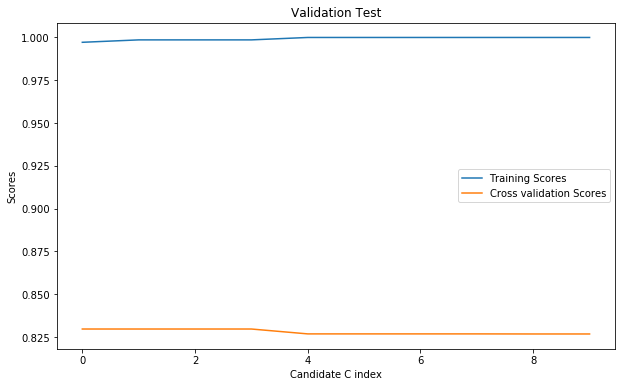

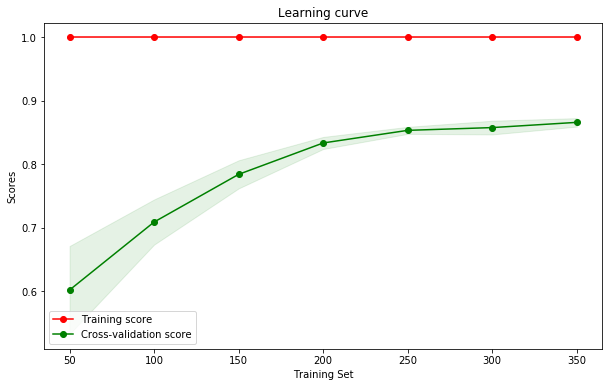

In [22]:
best_C = valid_test(LogisticRegression(), "C", np.logspace(1.7, 2.2, 10))
LR = LogisticRegression(C = best_C)
# LR = LogisticRegression()
Learning_curve(LR)
LR.fit(X_train_dtm, Y_train)
Y_test_pred_LR = LR.predict(X_test_dtm)

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LR)])
# Learning_curve(pipeline)
# # Learning_curve(LR)

# pipeline.fit(X_train, Y_train)
# Y_test_pred_LR = pipeline.predict(X_test)
# print('Train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

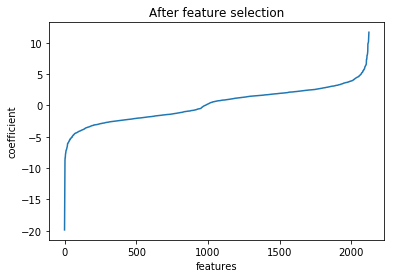

In [25]:
x = [x for x in range(LR.coef_.size)]
LR.coef_.sort()
y = LR.coef_
f, ax = plt.subplots(1,1)
ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.plot(x,y[0])
ax.set_title('After feature selection')
f.savefig('After_feature_selection_coef.jpeg')

In [ ]:
# x = [x for x in range(LR.coef_.size)]
# y = LR.coef_
# f, ax = plt.subplots(1,1)
# ax.set_ylabel('coefficient')
# ax.set_xlabel('features')
# ax.set_ylim([-20,15])
# ax.plot(x,y[0])
# ax.set_title('Before feature selection')
# f.savefig('Before_feature_selection_coef.jpeg')

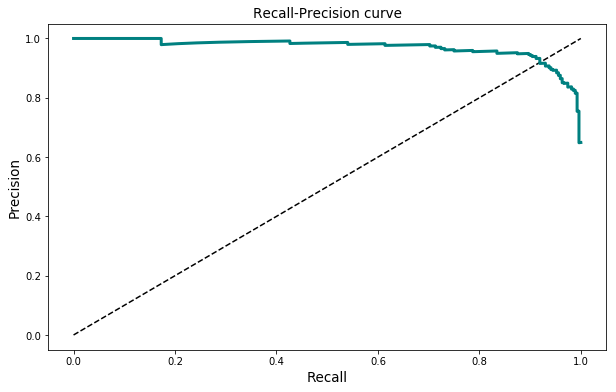

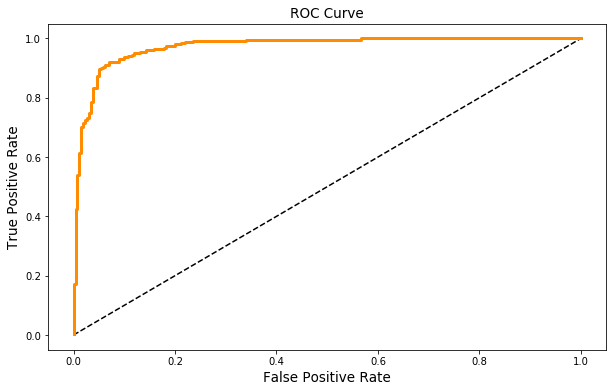

AUC is 0.9729445832387009
Train score is 0.9966052376333656
Test score is 0.9209039548022598
F1 score is 0.9213483146067415


In [24]:
# plot precision recall curve
plot_precision_recall(LR)
# plot ROC curve
plot_roc_curve(LR)
# print scores
print_scores(LR, Y_test_pred_LR)

In [ ]:
x = [x for x in range(LR.coef_.size)]
y = LR.coef_
f, ax = plt.subplots(1,1)
ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.plot(x,y[0])

## 2. Neural networking (MLP)

In [ ]:
best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(-5, -1, 10))
MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(1000), random_state=1, max_iter=200)
# MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 12, 12), random_state=1, max_iter=200)
MLP.fit(X_train_dtm, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test_dtm)

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("MLP_Classifier", MLP)])
# pipeline.fit(X_train, Y_train)
# Learning_curve(pipeline)
# Y_test_pred_MLP = MLP.predict(X_test)

# print('train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

In [ ]:
# plot precision recall curve
# plot_precision_recall(MLP)
# plot ROC curve
plot_roc_curve(MLP)
# print scores
print_scores(MLP, Y_test_pred_MLP)

## 3. Support Vector Machines

In [ ]:
best_gamma = valid_test(SVC(), "gamma", np.logspace(-5, 5, 10))
best_C = valid_test(SVC(gamma = best_gamma), "C", np.logspace(0, 10, 10))
svm = SVC(C = best_C, gamma = best_gamma)
# svm = SVC(C = 300, gamma = 0.1)
svm.fit(X_train_dtm, Y_train)
Learning_curve(svm)
Y_test_pred_svm = svm.predict(X_test_dtm)

In [ ]:
# plot precision recall curve
plot_precision_recall(svm)
# plot ROC curve
# plot_roc_curve(svm)
# print scores
print_scores(svm, Y_test_pred_svm)

## 4. RandomForestClassifier

In [ ]:
best_estimator = valid_test(RandomForestClassifier(), "n_estimators", [x for x in range(2,12)])
RF = RandomForestClassifier(n_estimators=best_estimator)
Learning_curve(RF)
%time RF.fit(X_train_dtm, Y_train)
Y_test_pred_RF = RF.predict(X_test_dtm)

In [ ]:
# RF does not have decision_function
#plot_precision_recall(RF, X_test_dtm, Y_test)

# plot ROC curve
plot_roc_curve(RF)
# print scores
print_scores(RF, Y_test_pred_RF)

## 5. naive_bayes

In [ ]:
best_alpha = valid_test(MultinomialNB(), "alpha", np.logspace(-10, 2, 10))
nb = MultinomialNB(alpha = best_alpha)
#nb = MultinomialNB()
Learning_curve(nb)
%time nb.fit(X_train_dtm, Y_train)
Y_test_pred_nb = nb.predict(X_test_dtm)    

In [ ]:
# nb does not have decision_function
#plot_precision_recall(nb)

# plot ROC curve
plot_roc_curve(nb)
# print scores
print_scores(nb, Y_test_pred_nb)